# **Problem 5: More Into Clustering**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [8]:
df_compound = pd.read_csv('Compound.txt', sep='\t', names=['x1','x2','label'])
df_pathbased = pd.read_csv('pathbased.txt', sep='\t', names=['x1','x2','label'])
df_spiral = pd.read_csv('spiral.txt', sep='\t', names=['x1','x2','label'])
df_D31 = pd.read_csv('D31.txt', sep='\t', names=['x1','x2','label'])
df_compound

,x1,x2,label
0,26.75,22.15,1
1,29.80,22.15,1
2,31.55,21.10,1
3,27.70,20.85,1
4,29.90,19.95,1
...,...,...,...
394,15.85,9.95,6
395,15.35,9.90,6
396,15.60,9.45,6
397,15.30,9.15,6


## A.

In [9]:
from matplotlib.colors import ListedColormap

# Define a list of 31 distinct colors
colors = ['#1f77b4', '#ff7f0e', '#6df7fd', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1a55FF', '#55a8ff', '#d62728', '#f9fd6d', '#ffa931', '#ff5733', '#c70039', '#900c3f', '#5c0029', '#6b4226',
          '#2b580c', '#aaff00', '#004d00', '#00ff55', '#004d33', '#00ffe5', '#0080ff', '#0000ff', '#8000ff', '#ff00aa', '#ff0033']

# Create a colormap
cmap = ListedColormap(colors)

Text(0.5, 1.0, 'D31')

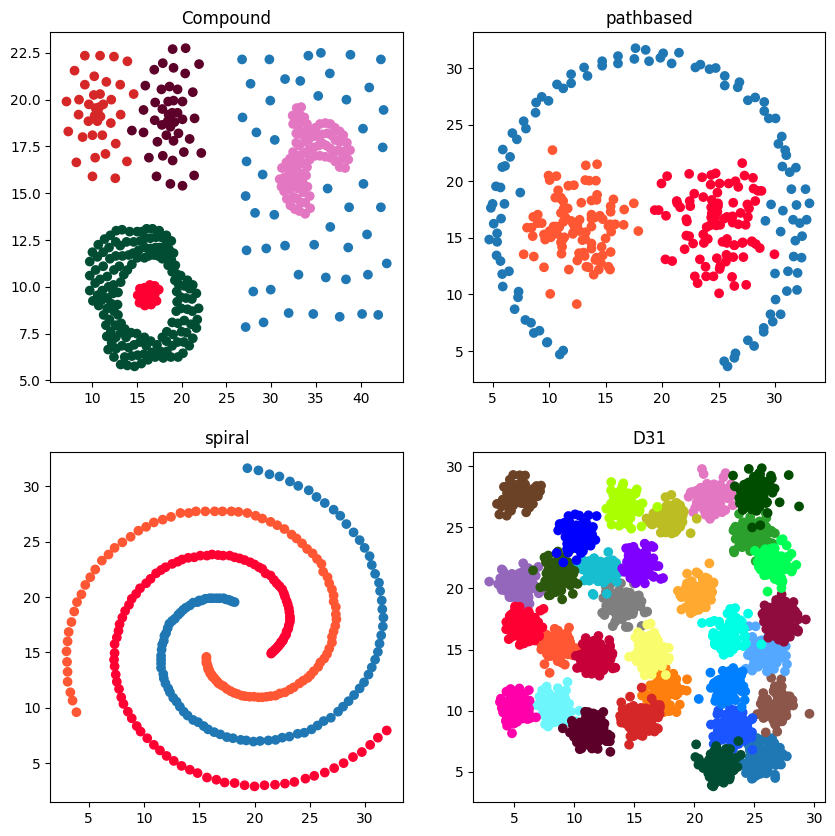

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].scatter(df_compound['x1'], df_compound['x2'], c=df_compound['label'], cmap=cmap)
axs[0, 0].set_title('Compound')

axs[0, 1].scatter(df_pathbased['x1'], df_pathbased['x2'], c=df_pathbased['label'], cmap=cmap)
axs[0, 1].set_title('pathbased')

axs[1, 0].scatter(df_spiral['x1'], df_spiral['x2'], c=df_spiral['label'], cmap=cmap)
axs[1, 0].set_title('spiral')

axs[1, 1].scatter(df_D31['x1'], df_D31['x2'], c=df_D31['label'], cmap=cmap)
axs[1, 1].set_title('D31')


In [11]:
scaler = StandardScaler()
X_compound = scaler.fit_transform(df_compound[['x1', 'x2']])
y_compound = df_compound['label']

scaler = StandardScaler()
X_pathbased = scaler.fit_transform(df_pathbased[['x1', 'x2']])
y_pathbased = df_pathbased['label']

scaler = StandardScaler()
X_spiral = scaler.fit_transform(df_spiral[['x1', 'x2']])
y_spiral = df_spiral['label']

scaler = StandardScaler()
X_D31 = scaler.fit_transform(df_D31[['x1', 'x2']])
y_D31 = df_D31['label']


In [12]:
class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.X = None
    
    def fit(self, X):
        self.X = X
        
        self.labels = [0]*len(X)
        label = 1

        for p in range(len(self.X)):
            if self.labels[p] == 0:
                neighbors_p = self.find_neighbors(p)
                if len(neighbors_p) < self.min_samples:
                    self.labels[p] = -1
                else:
                    self.find_connected_component(p, neighbors_p, label)
                    label += 1

    def find_connected_component(self, p, neighbors_p, label):
        self.labels[p] = label
        i = 0

        while i < len(neighbors_p):
            q = neighbors_p[i]
            if self.labels[q] == -1:
                self.labels[q] = label
            elif self.labels[q] == 0:
                self.labels[q] = label
                neighbors_q = self.find_neighbors(q)
                if len(neighbors_q) >= self.min_samples:
                    neighbors_p = neighbors_p + neighbors_q
            i += 1
    
    def find_neighbors(self, p):
        neighbors = []

        for q in range(0, len(self.X)):
            if np.linalg.norm(self.X[p] - self.X[q]) < self.eps:
                neighbors.append(q)
                
        return neighbors
    
    

In [13]:
dbscan_compound = DBSCAN(eps=0.2, min_samples=5)
dbscan_compound.fit(X_compound)

dbscan_pathbased = DBSCAN(eps=0.27, min_samples=9)
dbscan_pathbased.fit(X_pathbased)

dbscan_spiral = DBSCAN(eps=0.5, min_samples=5)
dbscan_spiral.fit(X_spiral)

dbscan_D31 = DBSCAN(eps=0.1, min_samples=20)
dbscan_D31.fit(X_D31)

In [14]:
# Number of clusters in labels, ignoring noise if present.
def calculate_n_clusters(dbscan):
    n_clusters_ = len(set(dbscan.labels)) - (1 if -1 in dbscan.labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    return n_clusters_

# Calculate purity
def calculate_purity(n_clusters_, dbscan, X, y):
    counts = np.zeros((n_clusters_, len(np.unique(y))))
    for i in range(len(dbscan.labels)):
        if dbscan.labels[i] != -1:  # Ignore noise
            counts[dbscan.labels[i]-1, y[i]-1] += 1
    purity = np.sum(np.amax(counts, axis=1)) / len(X)
    print('Purity: %.4f' % purity)
    return purity

n_clusters_compound= calculate_n_clusters(dbscan_compound)
n_clusters_pathbased = calculate_n_clusters(dbscan_pathbased)
n_clusters_spiral = calculate_n_clusters(dbscan_spiral)
n_clusters_D31 = calculate_n_clusters(dbscan_D31)

print()

purity_compound = calculate_purity(n_clusters_compound, dbscan_compound, X_compound, y_compound)
purity_pathbased = calculate_purity(n_clusters_pathbased, dbscan_pathbased, X_pathbased, y_pathbased)
purity_spiral = calculate_purity(n_clusters_spiral, dbscan_spiral, X_spiral, y_spiral)
purity_D31 = calculate_purity(n_clusters_D31, dbscan_D31, X_D31, y_D31)

Estimated number of clusters: 5
Estimated number of clusters: 2
Estimated number of clusters: 3
Estimated number of clusters: 31

Purity: 0.8095
Purity: 0.5833
Purity: 1.0000
Purity: 0.8600


## B.

Text(0.5, 1.0, 'D31')

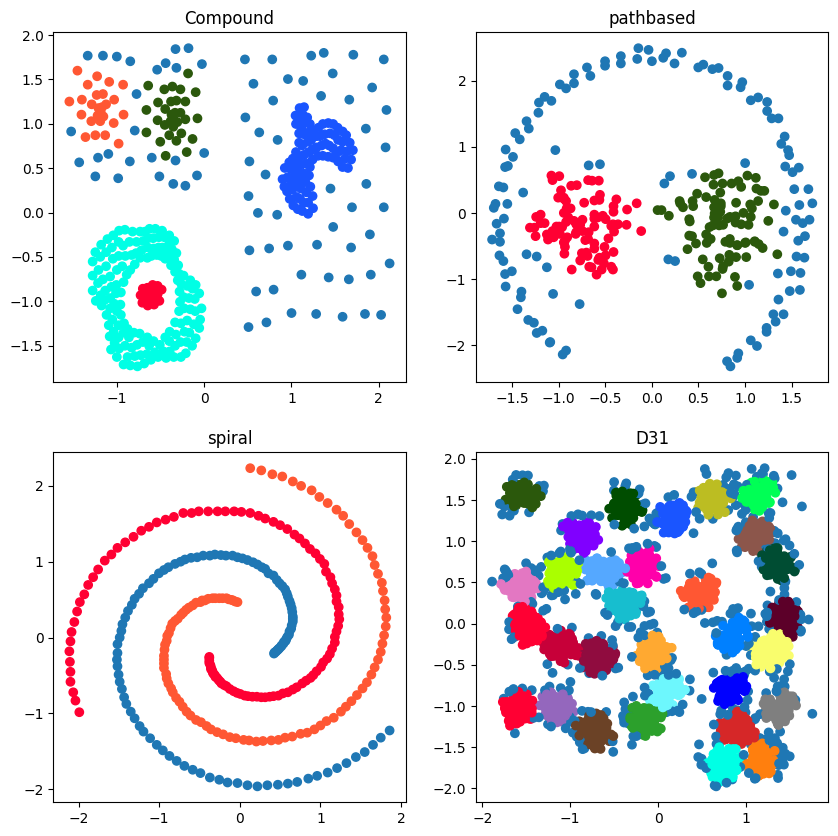

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].scatter(X_compound[:, 0], X_compound[:, 1], c=np.array(dbscan_compound.labels), cmap=cmap)
axs[0, 0].set_title('Compound')

axs[0, 1].scatter(X_pathbased[:, 0], X_pathbased[:, 1], c=np.array(dbscan_pathbased.labels), cmap=cmap)
axs[0, 1].set_title('pathbased')

axs[1, 0].scatter(X_spiral[:, 0], X_spiral[:, 1], c=np.array(dbscan_spiral.labels), cmap=cmap)
axs[1, 0].set_title('spiral')

axs[1, 1].scatter(X_D31[:, 0], X_D31[:, 1], c=np.array(dbscan_D31.labels), cmap=cmap)
axs[1, 1].set_title('D31')


## C.